# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import brfss

import thinkstats2
import thinkplot
import estimation

## The estimation game


Root mean squared error is one of several ways to summarize the average error of an estimation process.

In [2]:
def RMSE(estimates, actual):
    """Computes the root mean squared error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float RMSE
    """
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

The following function simulates experiments where we try to estimate the mean of a population based on a sample with size `n=7`.  We run `iters=1000` experiments and collect the mean and median of each sample.

In [3]:
import random

def Estimate1(n=7, iters=1000):
    """Evaluates RMSE of sample mean and median as estimators.

    n: sample size
    iters: number of iterations
    """
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for _ in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('Experiment 1')
    print('rmse xbar', RMSE(means, mu))
    print('rmse median', RMSE(medians, mu))
    
Estimate1()

Experiment 1
rmse xbar 0.38647939342912946
rmse median 0.4693613584093748


In [4]:
Estimate1(iters=100000)

Experiment 1
rmse xbar 0.37821271350746555
rmse median 0.4599768866200595


Using $\bar{x}$ to estimate the mean works a little better than using the median; in the long run, it minimizes RMSE.  But using the median is more robust in the presence of outliers or large errors.


## Estimating variance

The obvious way to estimate the variance of a population is to compute the variance of the sample, $S^2$, but that turns out to be a biased estimator; that is, in the long run, the average error doesn't converge to 0.

The following function computes the mean error for a collection of estimates.

In [5]:
def MeanError(estimates, actual):
    """Computes the mean error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float mean error
    """
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)

The following function simulates experiments where we try to estimate the variance of a population based on a sample with size `n=7`.  We run `iters=1000` experiments and two estimates for each sample, $S^2$ and $S_{n-1}^2$.

In [6]:
def Estimate2(n=7, iters=1000):
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('mean error biased', MeanError(estimates1, sigma**2))
    print('mean error unbiased', MeanError(estimates2, sigma**2))
    
Estimate2()

mean error biased -0.16007622770625118
mean error unbiased -0.02008893232395973


The mean error for $S^2$ is non-zero, which suggests that it is biased.  The mean error for $S_{n-1}^2$ is close to zero, and gets even smaller if we increase `iters`.

## The sampling distribution

The following function simulates experiments where we estimate the mean of a population using $\bar{x}$, and returns a list of estimates, one from each experiment.

In [7]:
def SimulateSample(mu=90, sigma=7.5, n=9, iters=1000):
    xbars = []
    for j in range(iters):
        xs = np.random.normal(mu, sigma, n)
        xbar = np.mean(xs)
        xbars.append(xbar)
    return xbars

xbars = SimulateSample()

Here's the "sampling distribution of the mean" which shows how much we should expect $\bar{x}$ to vary from one experiment to the next.

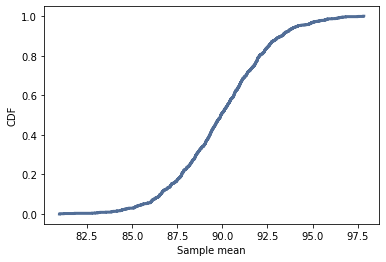

In [8]:
cdf = thinkstats2.Cdf(xbars)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Sample mean',
                 ylabel='CDF')

The mean of the sample means is close to the actual value of $\mu$.

In [9]:
np.mean(xbars)

89.93871394784935

An interval that contains 90% of the values in the sampling disrtribution is called a 90% confidence interval.

In [10]:
ci = cdf.Percentile(5), cdf.Percentile(95)
ci

(85.60042017191702, 94.1703080517108)

And the RMSE of the sample means is called the standard error.

In [11]:
stderr = RMSE(xbars, 90)
stderr

2.624013283199209

Confidence intervals and standard errors quantify the variability in the estimate due to random sampling.

## Estimating rates

The following function simulates experiments where we try to estimate the mean of an exponential distribution using the mean and median of a sample. 

In [12]:
def Estimate3(n=7, iters=1000):
    lam = 2

    means = []
    medians = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        L = 1 / np.mean(xs)
        Lm = np.log(2) / thinkstats2.Median(xs)
        means.append(L)
        medians.append(Lm)

    print('rmse L', RMSE(means, lam))
    print('rmse Lm', RMSE(medians, lam))
    print('mean error L', MeanError(means, lam))
    print('mean error Lm', MeanError(medians, lam))
    
Estimate3()

rmse L 1.1173868683878612
rmse Lm 1.8402428978565024
mean error L 0.3405495960503097
mean error Lm 0.4563198713009086


The RMSE is smaller for the sample mean than for the sample median.

But neither estimator is unbiased.

## Exercises

**Exercise:**  In this chapter we used $\bar{x}$ and median to estimate µ, and found that $\bar{x}$ yields lower MSE. Also, we used $S^2$ and $S_{n-1}^2$ to estimate σ, and found that $S^2$ is biased and $S_{n-1}^2$ unbiased.

Run similar experiments to see if $\bar{x}$ and median are biased estimates of µ. Also check whether $S^2$ or $S_{n-1}^2$ yields a lower MSE.

In [13]:
# Solution goes here

In [14]:
# Solution goes here

In [20]:
# Solution goes here


**Exercise:** Suppose you draw a sample with size n=10 from an exponential distribution with λ=2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

Repeat the experiment with a few different values of `n` and make a plot of standard error versus `n`.



In [30]:
# Solution goes here
import estimation

def ExpoSampleEstimate(lam=2, n=10, iters=10):
    estimates = []
    for _ in range(iters):
        xs = np.random.exponential(1/lam, n)
        lam_s = 1 / np.mean(xs)
        estimates.append(lam_s)
        
    std_error = estimation.RMSE(estimates=estimates, actual=lam)
    print(f"Standard Error: {std_error:.2f}")
    
    # get confidence interval of 90th percentile (5th - 95th)
    cdf = thinkstats2.Cdf(estimates)
    ci = (np.round(cdf.Value(0.05), 2), np.round(cdf.Value(0.95), 2))
    print(f"Confidence Interval (90th): {ci}")
    
#     thinkplot.Cdf(cdf)
#     thinkplot.Config(xlabel='lam estimate', ylabel='cdf', title='Sampling Distribution')
    
    
ExpoSampleEstimate()

Standard Error: 0.62
Confidence Interval (90th): (1.15, 3.27)


In [31]:
# Solution goes here

sample_sizes = [10, 50, 100, 1000, 10000, 100000]
for m in sample_sizes:
    print(m)
    ExpoSampleEstimate(n=m)
    print("\n")

10
Standard Error: 0.69
Confidence Interval (90th): (1.5, 3.67)


50
Standard Error: 0.23
Confidence Interval (90th): (1.64, 2.33)


100
Standard Error: 0.12
Confidence Interval (90th): (1.86, 2.22)


1000
Standard Error: 0.07
Confidence Interval (90th): (1.84, 2.1)


10000
Standard Error: 0.02
Confidence Interval (90th): (1.95, 2.04)


100000
Standard Error: 0.01
Confidence Interval (90th): (1.99, 2.0)




In [32]:
# Conclusions:
    
# Standard error and confidence intervals shrink as n increases.

# With a sample size of 1,000, Standard Error Falls below 0.1

**Exercise:** In games like hockey and soccer, the time between goals is roughly exponential. So you could estimate a team’s goal-scoring rate by observing the number of goals they score in a game. This estimation process is a little different from sampling the time between goals, so let’s see how it works.

Write a function that takes a goal-scoring rate, `lam`, in goals per game, and simulates a game by generating the time between goals until the total time exceeds 1 game, then returns the number of goals scored.

Write another function that simulates many games, stores the estimates of `lam`, then computes their mean error and RMSE.

Is this way of making an estimate biased?

In [37]:
def SimulateGame(lam):
    """Simulates a game and returns the estimated goal-scoring rate.

    lam: actual goal scoring rate in goals per game
    """
    goals = 0
    t = 0
    while True:
        time_between_goals = random.expovariate(lam)
        t += time_between_goals
        if t > 1:
            break
        goals += 1

    # estimated goal-scoring rate is the actual number of goals scored
    L = goals
    return L

In [38]:
# Solution goes here

def SimulateGames(m=10, lam=2):
    estimates = []
    for _ in range(m):
        sample_lam = SimulateGame(lam)
        estimates.append(sample_lam)
        
    mean_error = estimation.MeanError(estimates, lam)
    rmse = estimation.RMSE(estimates, lam) 
    
    print(f"""Mean Error: {mean_error:.2f}
RMSE: {rmse:.2f}""")
    
SimulateGames()
        
        

Mean Error: 0.10
RMSE: 1.45


In [42]:
# Solution goes here
# Solution goes here

num_games = [10, 50, 100, 1000, 10000, 100000]
for m in num_games:
    print("Sample size: ", m)
    SimulateGames(m=m)
    print("\n")

Sample size:  10
Mean Error: 0.30
RMSE: 1.52


Sample size:  50
Mean Error: 0.02
RMSE: 1.35


Sample size:  100
Mean Error: 0.18
RMSE: 1.48


Sample size:  1000
Mean Error: 0.04
RMSE: 1.41


Sample size:  10000
Mean Error: 0.00
RMSE: 1.42


Sample size:  100000
Mean Error: 0.01
RMSE: 1.42




In [ ]:
# this is unbiased because the mean error is small and decreases as m increases.